<a href="https://colab.research.google.com/github/junsoo321/public-repository/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


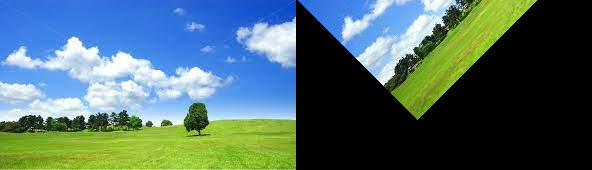

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
import glob

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/drive/MyDrive/test.jpg',cv2.IMREAD_COLOR)
height, width=img.shape[:2]
angle=45
radian=angle*np.pi/180
c=np.cos(radian)
s=np.sin(radian)
rotation_matrix=np.array([[c,s,0],[-s,c,0],[0,0,1]],dtype=float)

M=np.array([[1,0,100],[0,1,200]],dtype=float)
dst=np.zeros(img.shape,dtype=np.uint8)
for y in range(height-1):
  for x in range(width-1):
    new_p=np.array([x,y,1])
    inv_rotation_matrix=np.linalg.inv(rotation_matrix)
    old_p=np.dot(inv_rotation_matrix,new_p)
    x_,y_=old_p[:2]
    x_=int(x_)
    y_=int(y_)
    if x_ > 0 and x_<width and y_>0 and y_<height:
      dst[y,x]=img[y_,x_]


result=cv2.hconcat([img,dst])
cv2_imshow(result)